In [60]:
import numpy as np
import matplotlib.pyplot as plt
from generate_field import *
from matplotlib import cm, colors
import os
import imageio

In [61]:
config = 'test_le-8'


dir = '/home/zyou6474/tasks/channel_flow'
out_dir = '/home/zyou6474/Projects/python_util/visualization/results/%s' % config

t_total=5000
timestep = np.linspace(0, t_total, 100)
domain = [2*np.pi, np.pi, 1]
dims = [128, 128, 64]

theta_f = dir + '/outputs/theta.01.%.8i'
dTdx_f = dir + '/outputs/dTdx.%.8i'

u_f = dir + '/outputs/baseflow/u_base.%.8i'
v_f = dir + '/outputs/baseflow/v_base.%.8i'
w_f = dir + '/outputs/baseflow/w_base.%.8i'

In [62]:
# Generate the coordinates
x_coords, y_coords, z_coords = xyz(domain, dims)

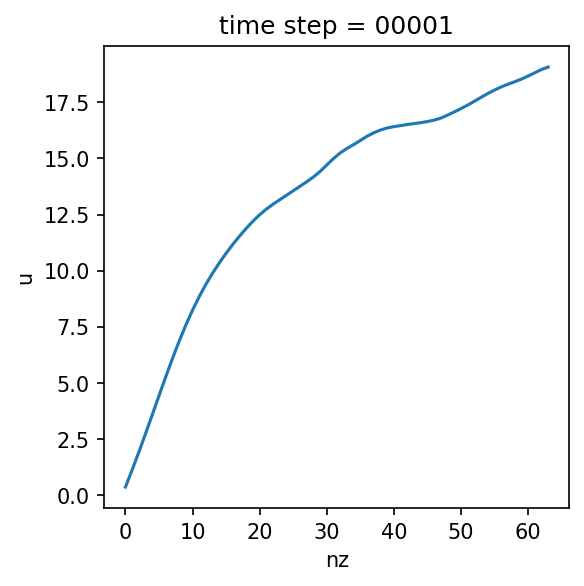

In [63]:
t = 1
# ic_f = '/home/ext-zyou6474/Projects/lesgo_adjoint_tutorial_bundle/tests/inputs/turbulence_128_128_64/u_velocity.IC'
u = read_array_from_file(u_f % t, dims)
# u = read_array_from_file(ic_f, [128, 128, 64])



fig, ax = plt.subplots(figsize=(4,4), dpi=150)
ax.plot(np.mean(u[:, 10, :], axis=0))
ax.set_title('time step = %.5i' %t)
ax.set_ylabel('u')
ax.set_xlabel('nz')
fig.show()

## Plot the setup of the source and sensor

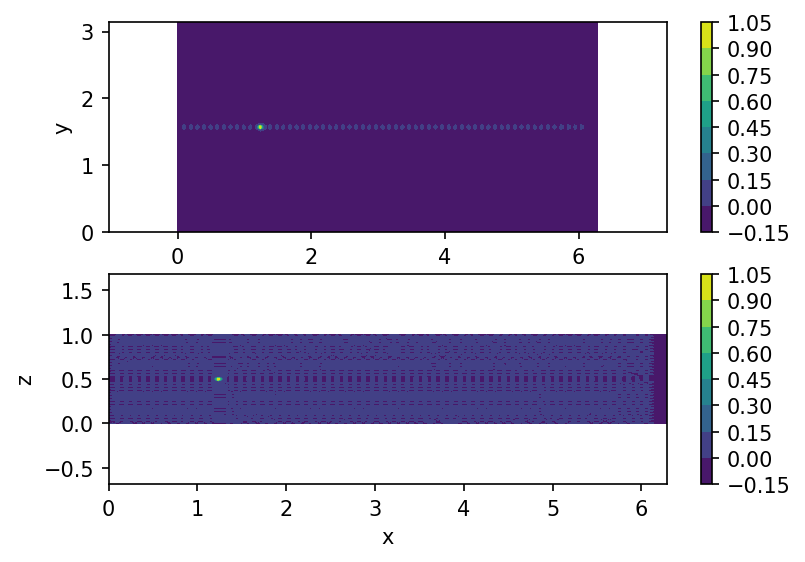

In [83]:
t=11
theta = read_array_from_file(theta_f % t, dims)
# theta[theta>0] =0

#theta[theta<0.1*theta.max()] = 0

fig, ax = plt.subplots(2, 1, figsize=(6,4), dpi=150)
cs = ax[0].contourf(x_coords, y_coords, theta[:, :, 32].T)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].axis('equal')

ax[0].set_ylim(bottom=0)

cbar = fig.colorbar(cs)


cs1 = ax[1].contourf(x_coords, z_coords, theta[:, 64, :].T)
ax[1].set_xlabel('x')
ax[1].set_ylabel('z')
ax[1].axis('equal')

ax[1].set_ylim(bottom=0)

cbar = fig.colorbar(cs1)
fig.show()

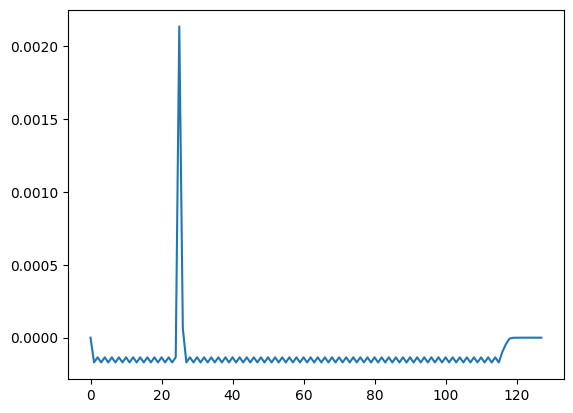

In [84]:
plt.plot(theta[:, 62, 32])

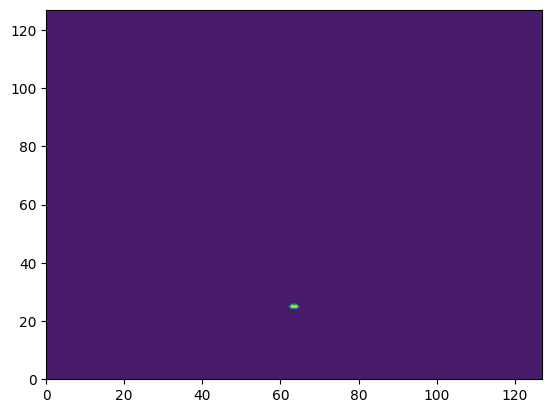

In [66]:
plt.contourf(theta[:, :, 32])

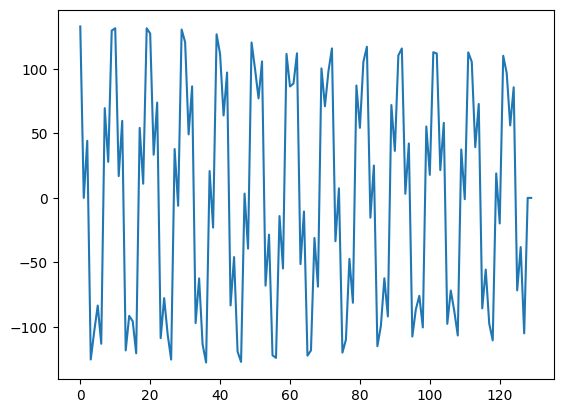

In [67]:
plt.plot(data[:, 0, 32])

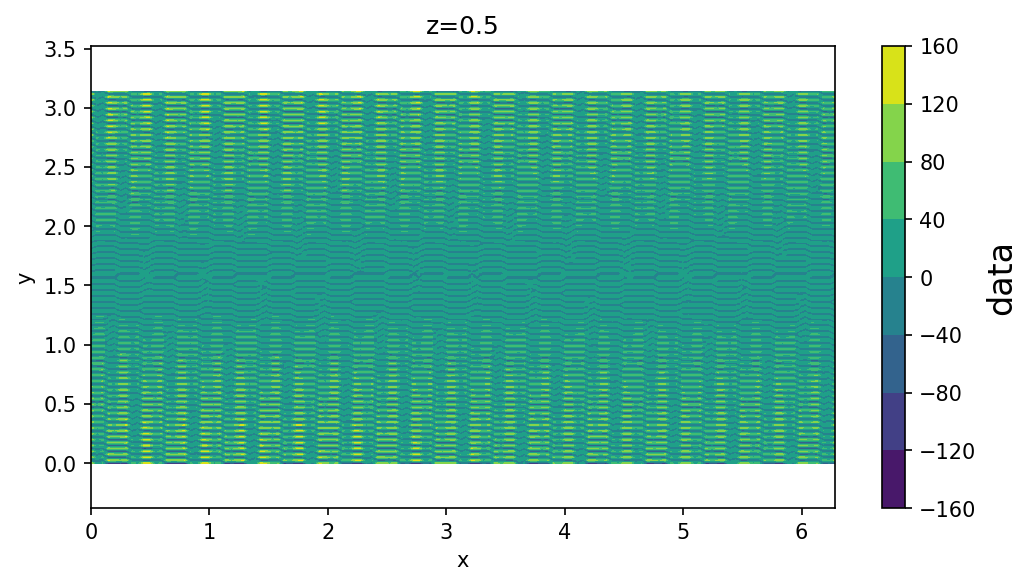

In [68]:
data_f = dir + '/outputs/RHS_col.%.8i'

data = read_array_from_file(data_f % int(t+1), [130, 128, 64])

#theta[theta<0.1*theta.max()] = 0

fig, ax = plt.subplots(figsize=(8,4), dpi=150)
cs = ax.contourf( x_coords, y_coords, data[:128, :, 32].T)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axis('equal')

ax.set_ylim(bottom=0)

cbar = fig.colorbar(cs)
cbar.set_label(r'data', size=16)

ax.set_title('z=0.5')
fig.show()

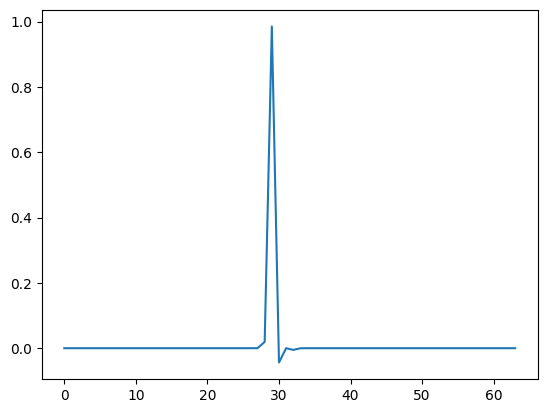

In [ ]:
plt.plot(data[0, 0, :])

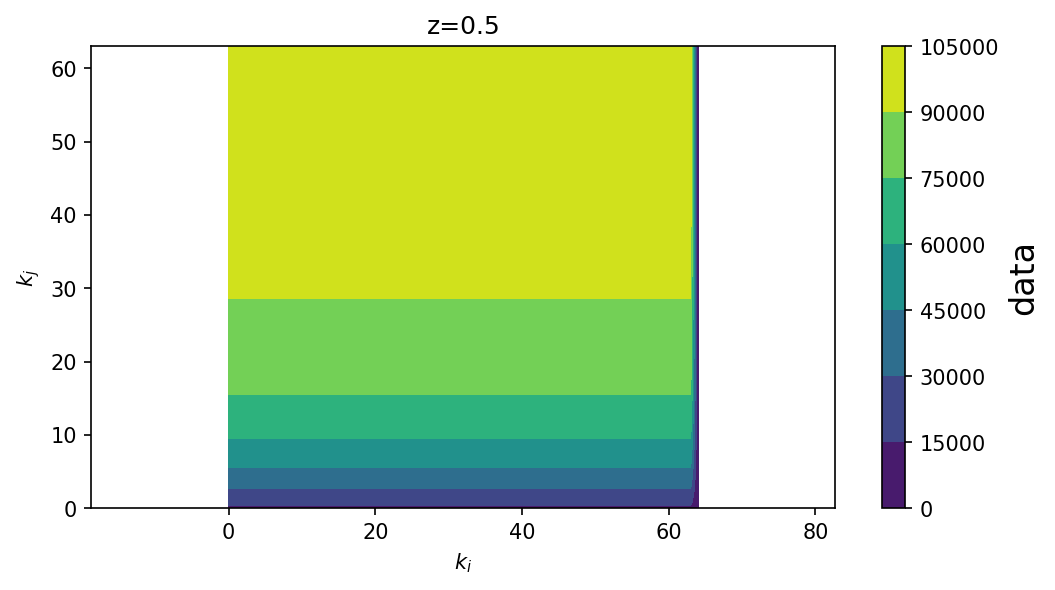

In [ ]:
data_f = dir + '/outputs/b.%.8i'

data = read_array_from_file(data_f % t, [65, 128, 64])

#theta[theta<0.1*theta.max()] = 0

fig, ax = plt.subplots(figsize=(8,4), dpi=150)
cs = ax.contourf(data[:, 5, :].T)
ax.set_xlabel('$k_i$')
ax.set_ylabel('$k_j$')
ax.axis('equal')

ax.set_ylim(bottom=0)

cbar = fig.colorbar(cs)
cbar.set_label(r'data', size=16)

ax.set_title('z=0.5')
fig.show()

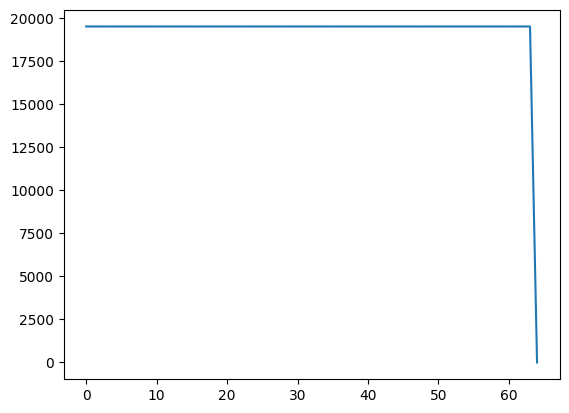

In [ ]:
data_f = dir + '/outputs/b.%.8i'

data = read_array_from_file(data_f % t, [65, 128, 64])

plt.plot(data[:, 0, 1])

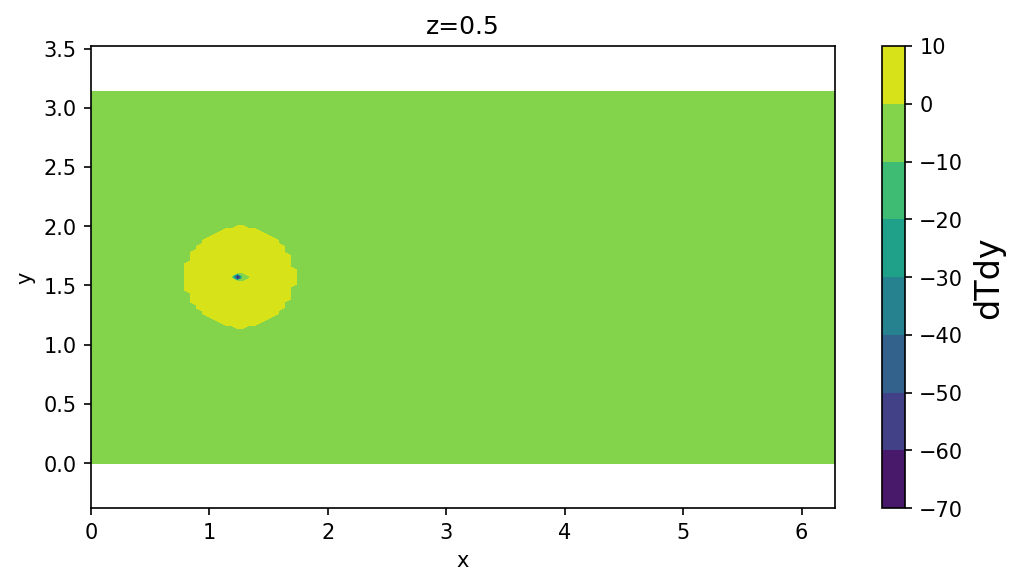

In [ ]:
data_f = dir + '/outputs/diffusion.%.8i'

dTdy = read_array_from_file(data_f % 1, [128, 128, 64])

#theta[theta<0.1*theta.max()] = 0

fig, ax = plt.subplots(figsize=(8,4), dpi=150)
cs = ax.contourf(x_coords, y_coords, dTdy[:, :, 32].T)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axis('equal')

ax.set_ylim(bottom=0)

cbar = fig.colorbar(cs)
cbar.set_label(r'dTdy', size=16)

ax.set_title('z=0.5')
fig.show()

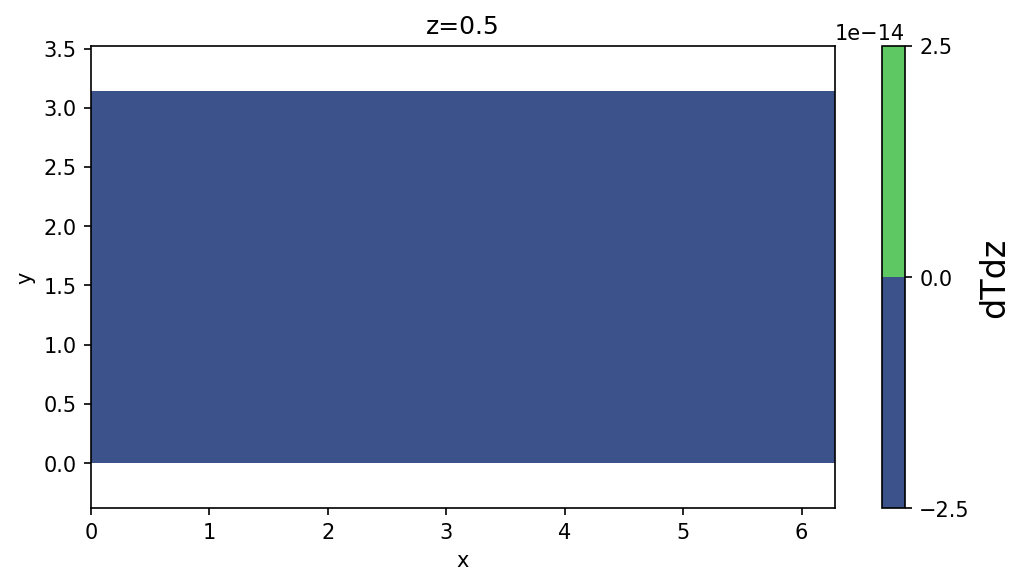

In [ ]:
data_f = dir + '/outputs/theta_kw.%.8i'

dTdz = read_array_from_file(data_f % 40, [128, 128, 64])

#theta[theta<0.1*theta.max()] = 0

fig, ax = plt.subplots(figsize=(8,4), dpi=150)
cs = ax.contourf(x_coords, y_coords, dTdz[:, :, 0].T)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axis('equal')

ax.set_ylim(bottom=0)

cbar = fig.colorbar(cs)
cbar.set_label(r'dTdz', size=16)

ax.set_title('z=0.5')
fig.show()

/tmp/ipykernel_21371/1777323629.py:14: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(x_coords, z_coords, theta[:, 64, :].T, levs, norm=colors.LogNorm(), cmap=cm.binary)


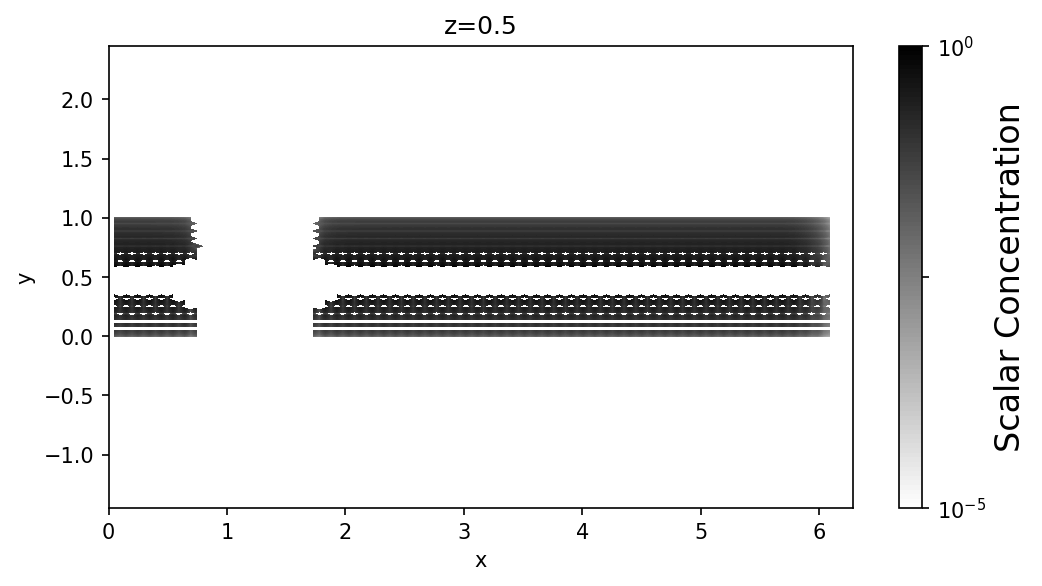

In [ ]:
# theta = 0
# for t in range(t_total):
#     theta += read_array_from_file(theta_f % t, dims)
# theta = theta/t_total
# # theta[theta<theta.max()*0.01]=0
levs = 10**np.linspace(-5, 0, 101)

theta = read_array_from_file(theta_f % t, dims)


#theta[theta<0.1*theta.max()] = 0

fig, ax = plt.subplots(figsize=(8,4), dpi=150)
cs = ax.contourf(x_coords, z_coords, theta[:, 64, :].T, levs, norm=colors.LogNorm(), cmap=cm.binary)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axis('equal')

ax.set_ylim(bottom=0)

cbar = fig.colorbar(cs)
cbar.set_ticks(levs[::50])
cbar.set_label(r'Scalar Concentration', size=16)

ax.set_title('z=0.5')
fig.show()

In [ ]:
def contourf_t(f, t, dims, z=64):

    theta = read_array_from_file(f % t, dims)
    # theta[theta<theta.max()*0.01]=0
    levs = 10**np.linspace(-6, 0, 101)

    # theta[theta<0.1*theta.max()] = 0

    fig, ax = plt.subplots(figsize=(8,4), dpi=150)
    cs = ax.contourf(x_coords, y_coords, theta[:, :, z].T, levs, norm=colors.LogNorm(), cmap=cm.binary)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.axis('equal')

    ax.set_ylim(bottom=0)

    cbar = fig.colorbar(cs)
    cbar.set_ticks(levs[::50])
    cbar.set_label(r'Scalar Concentration', size=16)

    ax.set_title('z=0.5')
    # fig.show()
    return fig

In [ ]:
filenames = []
for i in timestep:
    fig = contourf_t(theta_f, i, dims, z=32)
    
    # create file name and append it to a list
    filename = dir + f'/outputs/%.5i.png' % i
    filenames.append(filename)
    
    # save frame
    fig.savefig(filename)
    plt.close()
# build gif
with imageio.get_writer(dir + '/outputs/mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

/tmp/ipykernel_21371/955007618.py:10: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(x_coords, y_coords, theta[:, :, z].T, levs, norm=colors.LogNorm(), cmap=cm.binary)
/home/zyou6474/.venv/lib/python3.10/site-packages/matplotlib/contour.py:1459: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/tmp/ipykernel_21371/808366152.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
